Display ROC Curve

In [312]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

def compute_roc_data(file):
    """
    Compute ROC data such as FPR, TPR, AUC

    Inputs:
    file: path to the csv file containing the labels

    """
    labels = pd.read_csv(file)
    y_test_all = np.array([float(i) for s in labels['True Labels'] for i in s.split(',')])
    y_score_all = np.array([float(i) for s in labels['Predicted Scores'] for i in s.split(',')])

    # Sort by scores
    desc_score_indices = np.argsort(y_score_all)[::-1]
    y_score_all = y_score_all[desc_score_indices]
    y_test_all = y_test_all[desc_score_indices]

    # Compute FPR, TPR
    tpr = np.cumsum(y_test_all) / np.sum(y_test_all)
    fpr = np.cumsum(1 - y_test_all) / np.sum(1 - y_test_all)

    # Compute AUC
    roc_auc = np.sum(tpr[:-1] * np.diff(fpr))

    return 1 - fpr, tpr, roc_auc

def plot_roc_curves(label_files, models):
    """
    Plot ROC curves for each model

    Inputs:
    label_files: list of tuples (aligned_file, distorted_file)
    models: list of model names

    """
    fig, axs = plt.subplots(1, len(models), figsize=(18, 6))  
    for ax, (aligned_file, distorted_file), model in zip(axs, label_files, models):
        for file, label in zip([aligned_file, distorted_file], ['Aligned', 'Distorted']):
            specificity, sensitivity, roc_auc = compute_roc_data(file)
            ax.plot(specificity, sensitivity, label='%s (AUC = %0.2f)' % (label, roc_auc))
        
        ax.plot([1, 0], [0, 1], color='black', lw=2, linestyle='--')  
        ax.set_xlim([0.0, 1.05])
        ax.set_ylim([0.0, 1.05])
        ax.set_xlabel('Specificity')
        ax.set_ylabel('Sensitivity')
        ax.set_title(f'ROC for {model}')
        ax.legend(loc="lower left")

    plt.tight_layout()
    plt.show()


Display Error bars

In [313]:
def plot_error_bars(files, labels):
    """
    Plot error bars with 90% confidence intervals for the given
    files and labels.

    Inputs:
    files (list): List of file paths containing the accuracies.
    labels (list): List of labels for the models.

    """
    errors = []
    cis = []
    colors = ['#1f77b4', '#aec7e8',  # Blue shades for Model 1 and Distorted Model 1
              '#ff7f0e', '#ffbb78',  # Orange shades for Model 2 and Distorted Model 2
              '#2ca02c', '#98df8a']  # Green shades for Model 3 and Distorted Model 3

    for file in files:
        accuracies = pd.read_csv(file)["Outer Accuracy"][:-1]
        percentage_errors = (1 - accuracies) 
        mean_error = np.mean(percentage_errors)
        std_dev = np.std(percentage_errors)
        se = std_dev / np.sqrt(len(accuracies))
        t_value = 1.645  # t-value for 90% confidence interval
        confidence_interval = se * t_value

        errors.append(mean_error)
        cis.append(confidence_interval)

        print(f'{file}: Percentage Error = {mean_error:.4f}, CI = ±{confidence_interval:.4f}')

    plt.figure(figsize=(8, 6)) 
    plt.bar(labels, errors, yerr=cis, capsize=10, color=colors[:len(labels)], width=0.4, alpha=0.5, 
            error_kw={'elinewidth': 1.5, 'ecolor':'black'})  
    plt.grid(axis='y', linestyle='--', alpha=0.7, zorder=1) # Add grid lines
    plt.ylabel('Percentage Error')
    plt.title('Error bars with 90% Confidence Intervals')
    plt.ylim(0, 0.5) 
    plt.yticks(np.arange(0, 0.5, 0.05)) 
    plt.xticks(rotation=25, ha='right') 
    plt.tight_layout() 
    plt.show()
    plt.show()


Display Accuracy Curves

In [314]:
def plot_accuracy_curve(files1, files2, models1, models2, title1, title2):
    """
    Plots the accuracy curve for the two models side by side

    Inputs:
    files1: List of file paths for the models on original data
    files2: List of file paths for the models on distorted data
    models1: List of model names for the model on original data
    models2: List of model names for the model on distorted data
    title1: Title for the first plot 
    title2: Title for the second plot

    """
    fig, axs = plt.subplots(1, 2, figsize=(12, 6)) 

    # Data for aligned and distorted
    all_files = [files1, files2]
    all_models = [models1, models2]
    all_titles = [title1, title2]

    # Loop through the two subplots
    for ax, files, models, title in zip(axs, all_files, all_models, all_titles):
        for file, model in zip(files, models):
            accuracies = pd.read_csv(file)["Outer Accuracy"][:-1]  
            ax.plot(accuracies, label=model)
        
        ax.set_xlabel('Folds')
        ax.set_ylabel('Accuracy')
        ax.set_title(title)
        ax.legend(loc='lower left')
        ax.set_ylim(0, 1)
        ax.set_xticks(range(0, len(accuracies), 2)) 

    plt.tight_layout()
    plt.show()



Visualise Results for all models

In [315]:
# Load data file for each model
svm_label_file = 'results/svm_aligned_labels.csv'
svm_distorted_label_file = 'results/svm_distorted_labels.csv'
svm_result = 'results/svm_aligned.csv'
svm_distorted_result = 'results/svm_distorted.csv'
svm_model = "SVM"
svm_model_distorted = "SVM on distorted data"

cnn_label_file = 'results/cnn_aligned_labels.csv'
cnn_distorted_label_file = 'results/cnn_distorted_labels.csv'
cnn_result = 'results/cnn_aligned.csv'
cnn_distorted_result = 'results/cnn_distorted.csv'
cnn_model = "SVM-CNN"
cnn_model_distorted = "SVM-CNN on distorted data"

vit_label_file = 'results/hybridvit_aligned_labels.csv'
vit_distorted_label_file = 'results/hybridvit_distorted_labels.csv'
vit_result = 'results/hybridvit_aligned.csv'
vit_distorted_result = 'results/hybridvit_distorted.csv'
vit_model = "Hybrid ViT"
vit_model_distorted = "Hybrid ViT on distorted data"


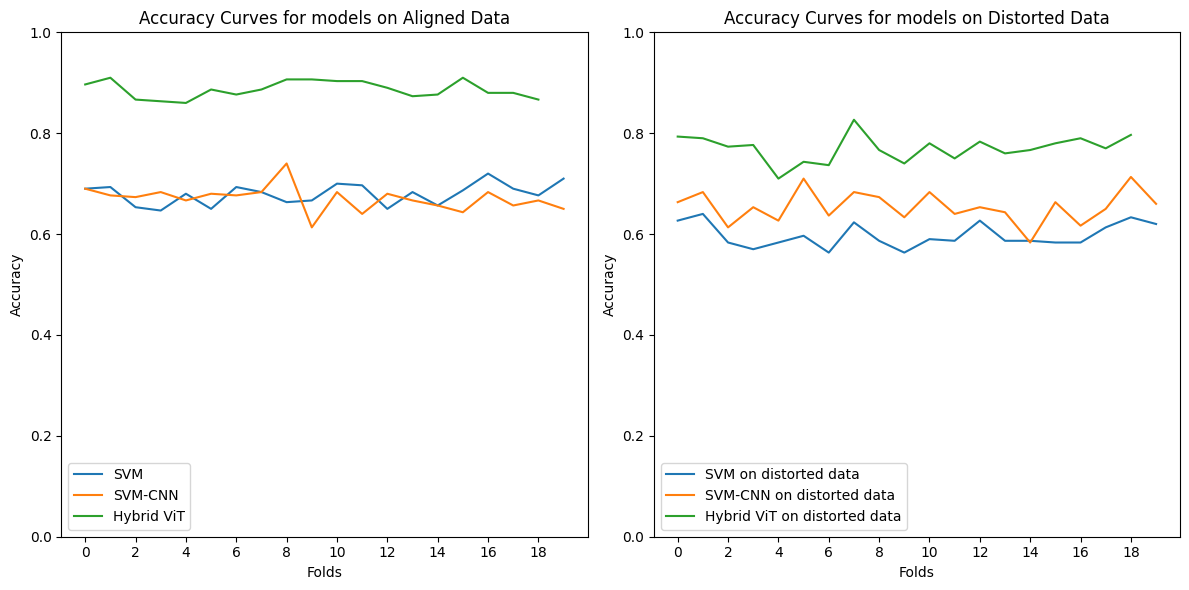

In [316]:
# Compute accuracy curves
results = [svm_result, cnn_result, vit_result]
models = [svm_model, cnn_model, vit_model]
result_distorted = [svm_distorted_result, cnn_distorted_result, vit_distorted_result]
model_distorted = [svm_model_distorted, cnn_model_distorted, vit_model_distorted]
plot_accuracy_curve(results, result_distorted, models, model_distorted, "Accuracy Curves for models on Aligned Data","Accuracy Curves for models on Distorted Data" )


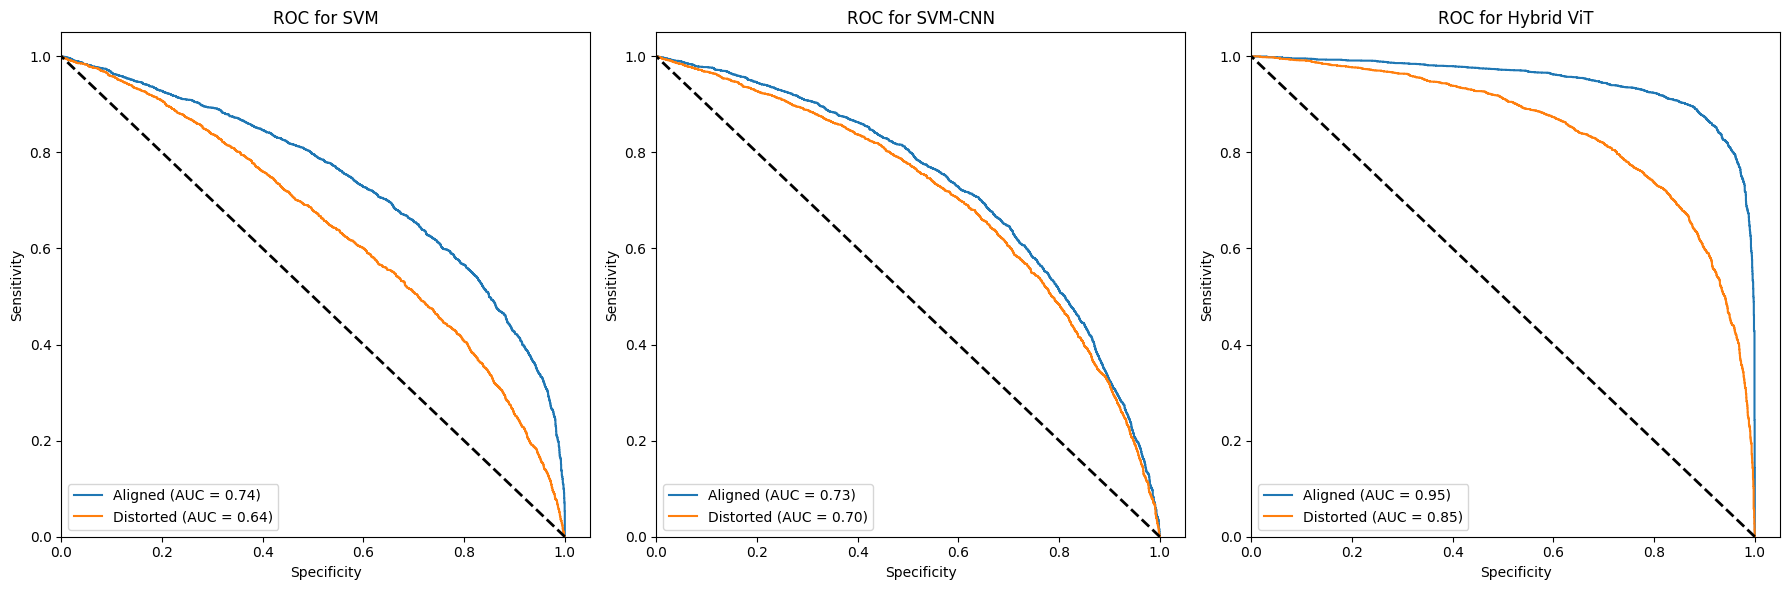

In [317]:
# Compute ROC Curve
label_files = [
    [svm_label_file, svm_distorted_label_file], 
    [cnn_label_file, cnn_distorted_label_file],
    [vit_label_file, vit_distorted_label_file]
]

models = [svm_model, cnn_model, vit_model]


plot_roc_curves(label_files, models)

results/svm_aligned.csv: Percentage Error = 0.3205, CI = ±0.0075
results/svm_distorted.csv: Percentage Error = 0.4027, CI = ±0.0085
results/cnn_aligned.csv: Percentage Error = 0.3295, CI = ±0.0090
results/cnn_distorted.csv: Percentage Error = 0.3458, CI = ±0.0115
results/hybridvit_aligned.csv: Percentage Error = 0.1135, CI = ±0.0062
results/hybridvit_distorted.csv: Percentage Error = 0.2298, CI = ±0.0097


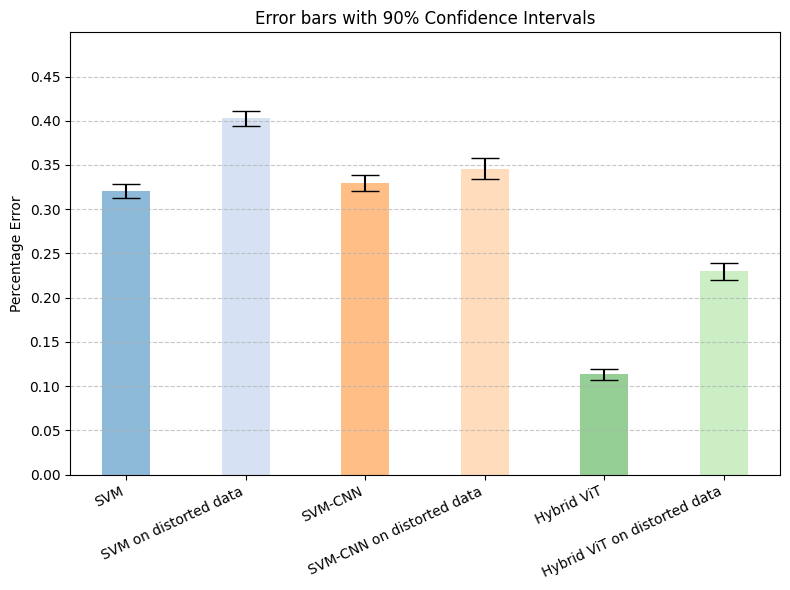

In [318]:
# Compute Error Bars
all_result = [svm_result, svm_distorted_result, cnn_result, cnn_distorted_result, vit_result, vit_distorted_result]
all_models = [svm_model, svm_model_distorted, cnn_model, cnn_model_distorted, vit_model, vit_model_distorted]
plot_error_bars(all_result, all_models)